<a href="https://colab.research.google.com/github/CharlesSailliot/Computer_vision_M2/blob/main/Mask_Detection_CNN_tensorflow_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Projet M2 Junia ISEN réalisé par : Xiang Zhenyu , Thibaud Dirou et Charles Sailliot**

Notre projet repose sur la détection du port d'un masque sur un être humain.


**I) Import the module and the dataset**

In [ ]:
import os 
import pandas as pd
import numpy as np
import cv2

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers

In [ ]:
#import the drive 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# récupérer les données en fichier zip et l'extraire ici

from zipfile import ZipFile
file_name = "/content/drive/MyDrive/data.zip"

with ZipFile(file_name, 'r') as zip_:
  zip_.extractall()
  print('Done')

Done


In [ ]:
batch_size = 40
img_height = 200
img_width = 200
## loading training data
training_ds = tf.keras.preprocessing.image_dataset_from_directory(
    'data',
    validation_split=0.2,
    subset= "training",
    seed=42,
    image_size= (img_height, img_width),
    batch_size=batch_size
)

Found 7553 files belonging to 2 classes.
Using 6043 files for training.


In [ ]:
## loading testing data
testing_ds = tf.keras.preprocessing.image_dataset_from_directory(
'data',
    validation_split=0.2,
    subset= "validation",
    seed=42,
    image_size= (img_height, img_width),
    batch_size=batch_size

)

Found 7553 files belonging to 2 classes.
Using 1510 files for validation.


In [ ]:
class_name = training_ds.class_names
print("Le nom des classes est : {}".format(class_name))



Le nom des classes est : ['with_mask', 'without_mask']


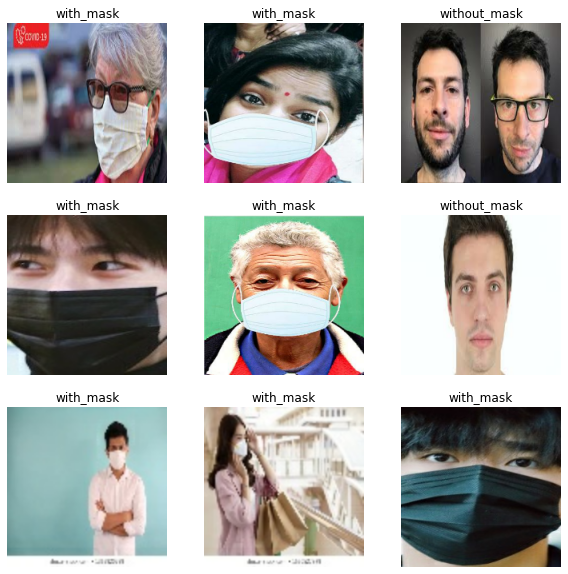

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in training_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_name[labels[i]])
    plt.axis("off")

In [ ]:
for image_batch, labels_batch in training_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(40, 200, 200, 3)
(40,)


In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = training_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = testing_ds.cache().prefetch(buffer_size=AUTOTUNE)

II) Définition du modèle :

In [ ]:
model = tf.keras.models.Sequential([
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, activation='relu'),
  layers.MaxPooling2D(),
  # Some thing I realised just
  # using flatten layer will 
  # increase the size of your
  # model, hence use
  # Global avg Pooling 
  # instead
  # layers.Flatten(),
  layers.GlobalAveragePooling2D(),
  layers.Dense(256, activation='relu'),
  layers.Dense(2, activation= 'softmax')
])


In [ ]:
model.compile(optimizer = "adam",
              loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
               metrics=['accuracy'])

In [ ]:
hist = model.fit(train_ds, validation_data = val_ds, epochs = 15)

Epoch 1/15


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


152/152 [==============================] - 450s 3s/step - loss: 0.5947 - accuracy: 0.6778 - val_loss: 0.5065 - val_accuracy: 0.7576
Epoch 2/15
152/152 [==============================] - 436s 3s/step - loss: 0.5374 - accuracy: 0.7341 - val_loss: 0.4971 - val_accuracy: 0.7629
Epoch 3/15
152/152 [==============================] - 437s 3s/step - loss: 0.5204 - accuracy: 0.7420 - val_loss: 0.4883 - val_accuracy: 0.7656
Epoch 4/15
152/152 [==============================] - 436s 3s/step - loss: 0.4790 - accuracy: 0.7708 - val_loss: 0.3946 - val_accuracy: 0.8344
Epoch 5/15
152/152 [==============================] - 437s 3s/step - loss: 0.3963 - accuracy: 0.8239 - val_loss: 0.3244 - val_accuracy: 0.8815
Epoch 6/15
152/152 [==============================] - 436s 3s/step - loss: 0.3565 - accuracy: 0.8531 - val_loss: 0.2858 - val_accuracy: 0.8940
Epoch 7/15
152/152 [==============================] - 437s 3s/step - loss: 0.3268 - accuracy: 0.8679 - val_loss: 0.2579 - val_accuracy: 0.9086
Epoch 8/15

In [ ]:
model.save("model.model")

INFO:tensorflow:Assets written to: model.model/assets


In [ ]:
score = model.evaluate(testing_ds, verbose = 0)
print(" tess loss, tess acc : {}".format(score))  

 tess loss, tess acc : [0.16158641874790192, 0.9370861053466797]


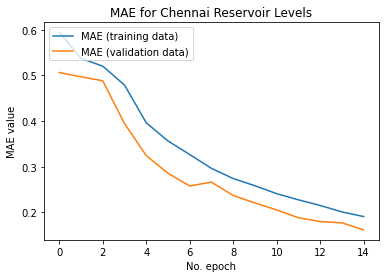

In [ ]:
# Plot history: MAE
plt.plot(hist.history['loss'], label='MAE (training data)')
plt.plot(hist.history['val_loss'], label='MAE (validation data)')
plt.title('MAE for Chennai Reservoir Levels')
plt.ylabel('MAE value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

Source 
https://www.tensorflow.org/tutorials/load_data/images